In [73]:
import coursework as cw
import numpy as np
from tqdm import tqdm
from scipy.spatial import distance
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.sparse import csgraph
import scipy.stats.stats as st
from tqdm import tqdm
import math
from importlib import reload
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

np.random.seed(101)

# Experiment 1

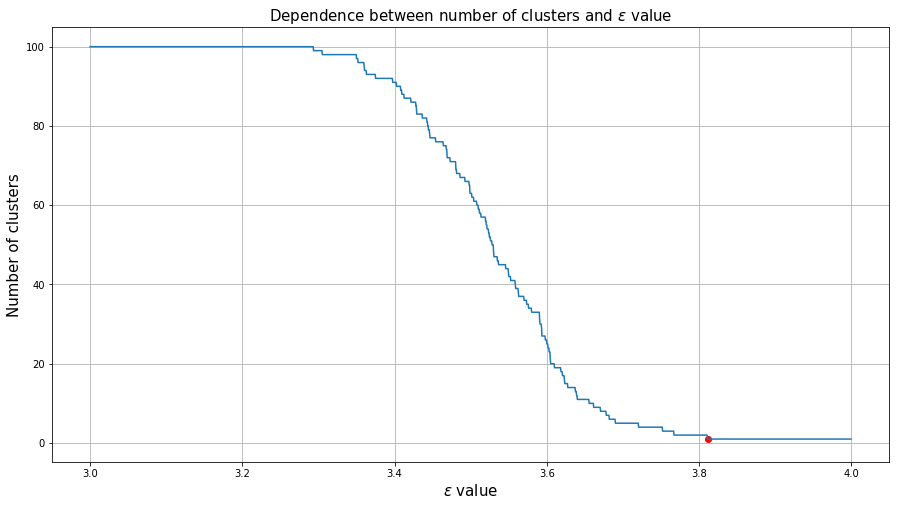

3.811000000000271

In [21]:
reload(cw)
cw.Exp1(100, 100, 1, 3, 4, 2000, True, True)

### n = 100, k = 100, a = 1

In [22]:
reload(cw)
epsilons = np.array([])

for i in tqdm(range(500)):
    epsilons = np.append(epsilons, (cw.Exp1(100, 100, 1, 3.6, 4, 1000, False, False)))

epsilons = epsilons[epsilons != None]
mean = np.mean(epsilons)
std = np.std(epsilons)
var = np.var(epsilons)
print('Mean =', mean)
print('Standart deviation =', std)
print('Variance =', var)

100%|████████████████████████████████████████| 500/500 [18:48<00:00,  2.26s/it]


Mean = 3.8022415999999777
Standart deviation = 0.051787886126384894
Variance = 0.002681985149439409


### n = 200, k = 100, a = 1

In [31]:
reload(cw)
epsilons2 = np.array([])

for i in tqdm(range(500)):
    epsilons2 = np.append(epsilons2, (cw.Exp1(200, 100, 1, 5.4, 5.6, 1000, False, False)))

epsilons2 = epsilons2[epsilons2 != None]
mean2 = np.mean(epsilons2)
std2 = np.std(epsilons2)
var2 = np.var(epsilons2)
print('Mean =', mean2)
print('Standart deviation =', std2)
print('Variance =', var2)

100%|████████████████████████████████████████| 500/500 [19:36<00:00,  2.35s/it]


Mean = 5.497943815513833
Standart deviation = 0.044719947904560055
Variance = 0.0019998737405865653


### n = 200, k = 100, a = 3

In [33]:
reload(cw)
epsilons3 = np.array([])

for i in tqdm(range(500)):
    epsilons3 = np.append(epsilons3, (cw.Exp1(200, 100, 3, 16, 17, 1000, False, False)))
    
epsilons3 = epsilons3[epsilons3 != None]
mean3 = np.mean(epsilons3)
std3 = np.std(epsilons3)
var3 = np.var(epsilons3)
print('Mean =', mean3)
print('Standart deviation =', std3)
print('Variance =', var3)

100%|████████████████████████████████████████| 500/500 [23:44<00:00,  2.85s/it]


Mean = 16.511501002004632
Standart deviation = 0.14055772639005684
Variance = 0.01975647444794208


In [36]:
print('Ratio of mean epsilon value to the length of diagonal:')
print('First set of parameters:', mean / (1 * math.sqrt(100)))
print('Second set of parameters:', mean2 / (1 * math.sqrt(200)))
print('Third set of parameters:', mean3 / (3 * math.sqrt(200)))

Ratio of mean epsilon value to the length of diagonal:
First set of parameters: 0.38022415999999776
Second set of parameters: 0.38876333545324715
Third set of parameters: 0.38917981086953163


# Experiment 2

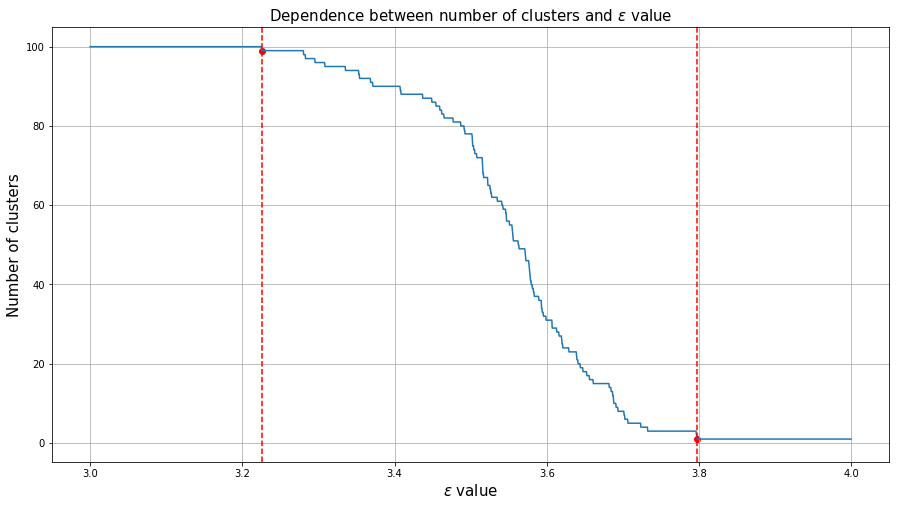

(3.2255000000000753, 3.7975000000002663)

In [51]:
reload(cw)
cw.Exp2(100, 100, 1, 3, 4, 2000, True, True)

In [50]:
diff_epsilons = np.array([])

for i in tqdm(range(500)):
    tuples = cw.Exp2(100, 100, 1, 3, 4, 1000, False, False)
    diff_epsilons = np.append(diff_epsilons, tuples[1] - tuples[0])
    
diff_epsilons = diff_epsilons[diff_epsilons != None]
mean4 = np.mean(diff_epsilons)
std4 = np.std(diff_epsilons)
var4 = np.var(diff_epsilons)
print('Window width:')
print('Mean =', mean4)
print('Standart deviation =', std4)
print('Variance =', var4)

100%|████████████████████████████████████████| 500/500 [13:58<00:00,  1.68s/it]


Window width:
Mean = 0.6273859999999308
Standart deviation = 0.09285027196512728
Variance = 0.008621173003998102


# Experiment 3

In [52]:
reload(cw)
k_values = np.array([])

for i in tqdm(range(100)):
    for j in range(2,1000):
        if cw.Exp3(100, j, 1, 3.7):
            k_values = np.append(k_values, j)
            break

100%|████████████████████████████████████████| 100/100 [28:55<00:00, 17.36s/it]


In [74]:
mean_val = np.array([])
std_val = np.array([])
var_val = np.array([])

for i in range(500):
    subselection = np.random.choice(k_values, size=50)
    mean_val = np.append(mean_val, np.mean(subselection))
    std_val = np.append(std_val, np.std(subselection))
    var_val = np.append(var_val, np.var(subselection))

k_mean = np.mean(mean_val)
k_std = np.mean(std_val)
k_var = np.mean(var_val)

print('K value:')
print('Bootstrap mean:', k_mean)
print('Bootstrap standart deviation:', k_std)
print('Bootstrap variance:', k_var)

K value:
Bootstrap mean: 120.70576000000001
Bootstrap standart deviation: 55.68512548121798
Bootstrap variance: 3134.5820752


# Experiment 4

In [75]:
reload(cw)
first = np.array([]) 
second = np.array([])
all_eigenvalues = np.array([])
nomax_eigenvalues = np.array([])

for i in tqdm(range(500)):
    new_matrix = cw.Exp4(100, 100, 1, 3.6, 4, 1000)
    eigenvalues = np.linalg.eigvals(new_matrix)
    eigenvalues = np.sort(eigenvalues)
    all_eigenvalues = np.append(all_eigenvalues, eigenvalues)
    first = np.append(first, eigenvalues[-1])
    second = np.append(second, eigenvalues[-2])
    eigenvalues = eigenvalues[:-1]
    nomax_eigenvalues = np.append(nomax_eigenvalues, eigenvalues)

100%|████████████████████████████████████████| 500/500 [07:59<00:00,  1.04it/s]


In [77]:
first_mean = np.mean(first)
first_std = np.std(first)
first_var = np.var(first)

second_mean = np.mean(second)
second_std = np.std(second)
second_var = np.var(second)

print('First eigenvalue mean:', first_mean)
print('First eigenvalue std:', first_std)
print('First eigenvalue var:', first_var)
print('\n')
print('Second eigenvalue mean:', second_mean)
print('Second eigenvalue std:', second_std)
print('Second eigenvalue var:', second_var)

First eigenvalue mean: 19.452704832443136
First eigenvalue std: 4.92139183638205
First eigenvalue var: 24.22009760720788


Second eigenvalue mean: 8.350182564800106
Second eigenvalue std: 0.8723509795000134
Second eigenvalue var: 0.7609962314346328


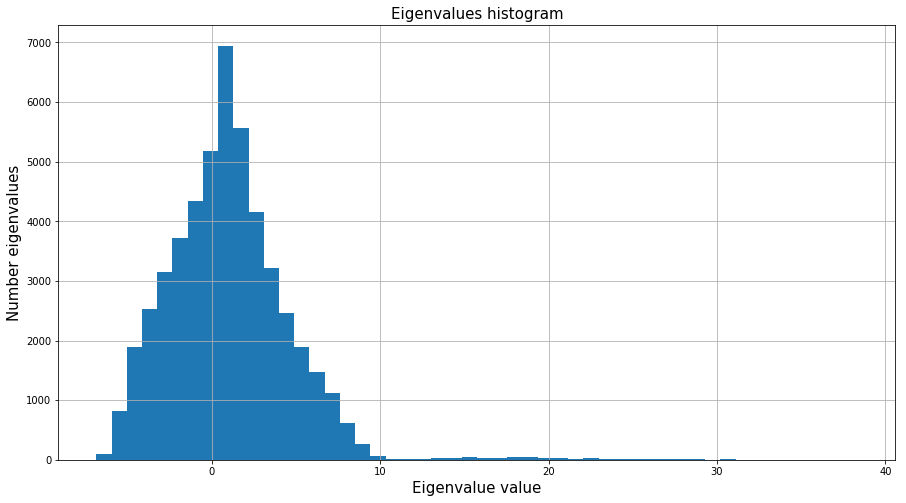

In [84]:
fig = plt.figure(figsize=(15, 8))

plt.hist(all_eigenvalues, bins=50)
plt.title('Eigenvalues histogram', size=15)
plt.ylabel('Number eigenvalues', size=15)
plt.xlabel('Eigenvalue value', size=15)
plt.grid()
plt.show()
pp = PdfPages('CWExp4_1.pdf')
pp.savefig(fig)
pp.close()

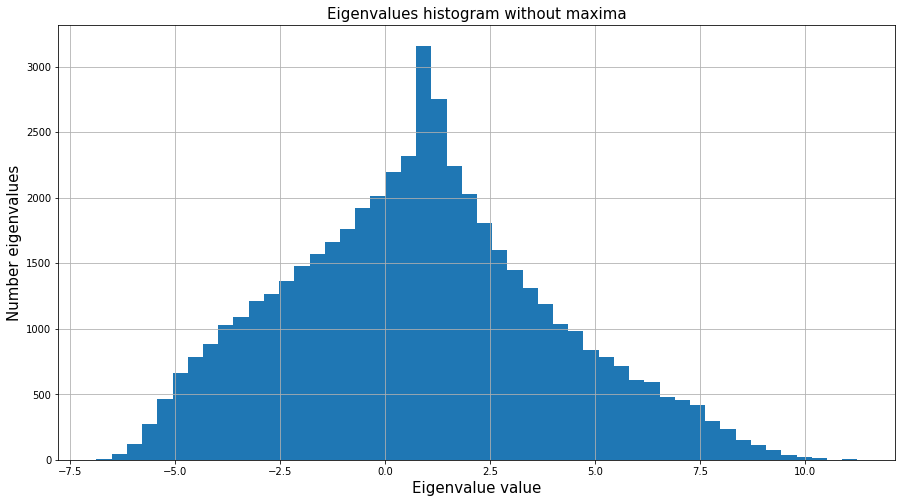

In [85]:
fig = plt.figure(figsize=(15, 8))

plt.hist(nomax_eigenvalues, bins=50)
plt.title('Eigenvalues histogram without maxima', size=15)
plt.ylabel('Number eigenvalues', size=15)
plt.xlabel('Eigenvalue value', size=15)
plt.grid()
plt.show()
pp = PdfPages('CWExp4_2.pdf')
pp.savefig(fig)
pp.close()

# Experiment 5

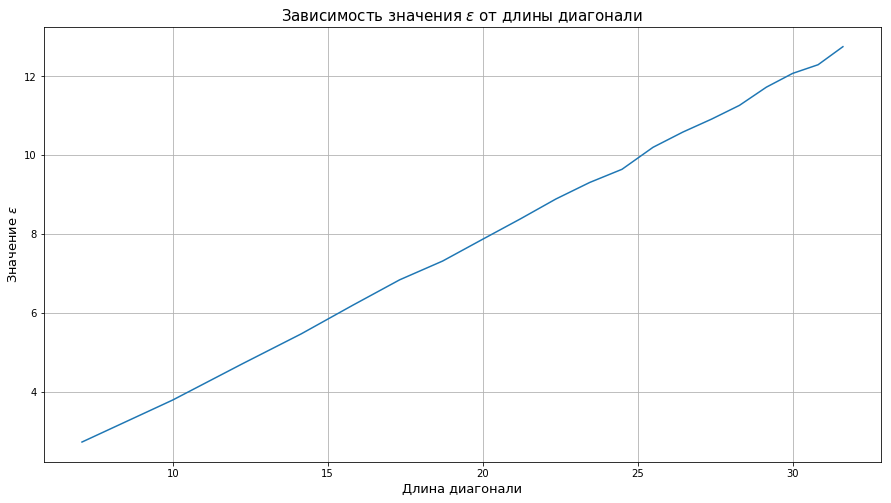

In [119]:
n_values = np.arange(50,1050,50)
diag_values = np.sqrt(n_values)

eps_values = np.array([])

for n in n_values:
    eps_values = np.append(eps_values, Compute(n, 100, 1, 1*n/100, 20*n/100, 2000, False, False))

fig = plt.figure(figsize=(15,8))
plt.plot(diag_values, eps_values)
plt.title('Зависимость значения $\epsilon$ от длины диагонали', size=15)
plt.xlabel('Длина диагонали', size=13)
plt.ylabel('Значение $\epsilon$', size=13)
plt.legend()
plt.grid()
plt.show()

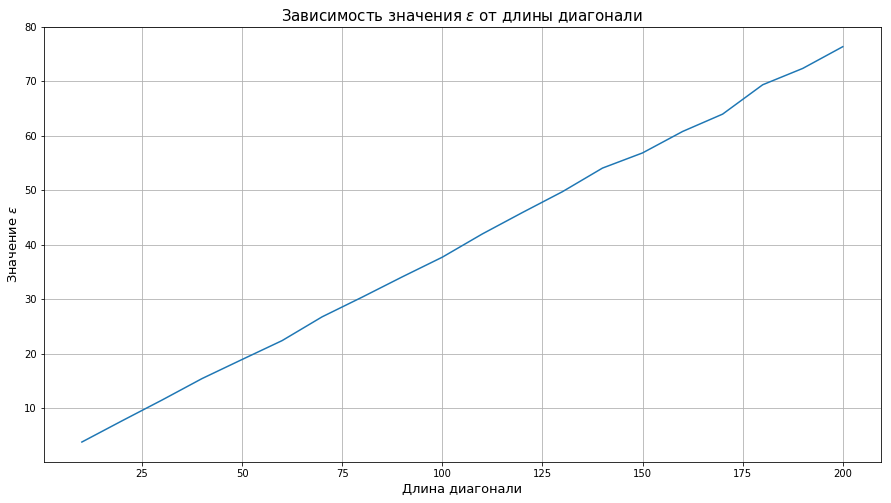

In [124]:
a_values = np.arange(1,21,1)
diag_values = a_values*np.sqrt(100)

eps_values = np.array([])

for a in a_values:
    test = Compute(100, 100, a, 1*a, 10*a, 1000, False, False)
    eps_values = np.append(eps_values, test)

fig = plt.figure(figsize=(15,8))
plt.plot(diag_values, eps_values)
plt.title('Зависимость значения $\epsilon$ от длины диагонали', size=15)
plt.xlabel('Длина диагонали', size=13)
plt.ylabel('Значение $\epsilon$', size=13)
plt.legend()
plt.grid()
plt.show()

# Experiment 6 (Betti)

In [23]:
def Compute6(n, k, a, eps_min, eps_max, steps):
    
    '''
    n - размерность пространства
    k - количество точек
    a - длина ребра гиперкуба
    eps_min - минимальное значение eps
    eps_max - максимальное значение eps
    steps - количество итераций от eps_min до eps_max
    
    Возвращает значение числа Бетти для заданных параметров
    '''
    
    matrix = DotsCoordinates(n, k, a)
    euclid_matrix = EuclidMatrix(matrix)
    components_num = np.array([])
    flag = False
    epsilons = np.arange(eps_min, eps_max, (eps_max - eps_min)/steps)
    for i in range(steps):
        adj_matrix = CreateAdjMatrix(euclid_matrix, epsilons[i])
        components = csgraph.connected_components(csgraph=adj_matrix, directed=False, return_labels=False)
        components_num = np.append(components_num, components)
        if (components == 1 and flag == False):
            one_component_x = epsilons[i]
            one_component_y = components
            flag = True
            if flag:
                new_eps = one_component_x
          
    if not flag:
        return None
    else:
        edges_num = (np.count_nonzero(adj_matrix == 1) - k) // 2
        Betti = edges_num - k + components_num[-1]
        return Betti

In [25]:
Bettis = np.array([])

for i in tqdm(range(500)):
    Bettis = np.append(Bettis, (Compute6(100, 100, 1, 3.6, 4, 1000)))


100%|████████████████████████████████████████| 500/500 [19:12<00:00,  2.30s/it]


TypeError: unsupported operand type(s) for +: 'float' and 'NoneType'

In [26]:
Bettis_none = Bettis[Bettis != None]
mean6 = np.mean(Bettis_none)
std6 = np.std(Bettis_none)
var6 = np.var(Bettis_none)
print('Betti Mean =', mean6)
print('Betti Standart deviation =', std6)
print('Betti Variance =', var6)

Betti Mean = 1750.6573146292585
Betti Standart deviation = 142.50629772534953
Betti Variance = 20308.044891385958


# Experiment 7 (a and eps, n and eps)

100%|██████████████████████████████████████████| 20/20 [02:29<00:00,  7.48s/it]


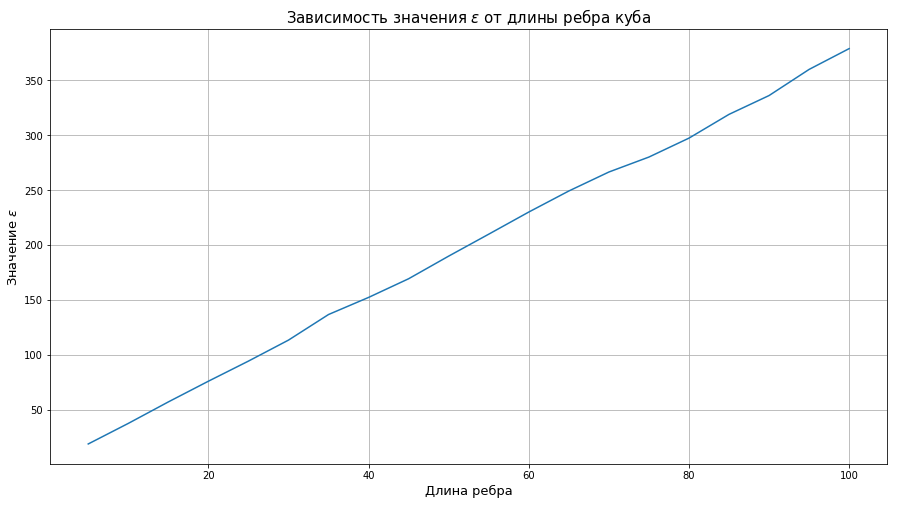

In [34]:
a_values = np.arange(5,105,5)
diag_values = a_values*np.sqrt(100)

eps_values = np.array([])

for a in tqdm(a_values):
    test = Compute(100, 100, a, 1*a, 10*a, 1000, False, False)
    eps_values = np.append(eps_values, test)

fig = plt.figure(figsize=(15,8))
plt.plot(a_values, eps_values)
plt.title('Зависимость значения $\epsilon$ от длины ребра куба', size=15)
plt.xlabel('Длина ребра', size=13)
plt.ylabel('Значение $\epsilon$', size=13)
plt.legend()
plt.grid()
plt.show()

100%|██████████████████████████████████████████| 40/40 [05:46<00:00,  8.65s/it]


[ 2.52755  3.7218   4.7469   5.573    6.26975  6.867    7.38465  8.0416
  8.59905  8.858    9.41545  9.6744  10.2219  10.5903  11.04825 11.4664
 11.84475 12.0042  12.48205 12.741   13.1691  13.3584  13.73675 14.0952
 14.185   14.4937  14.7825  15.33    15.58895 15.5295  16.04715 16.2464
 16.42575 16.9235  17.073   17.2026  17.68045 17.7802  17.86005 18.318  ]


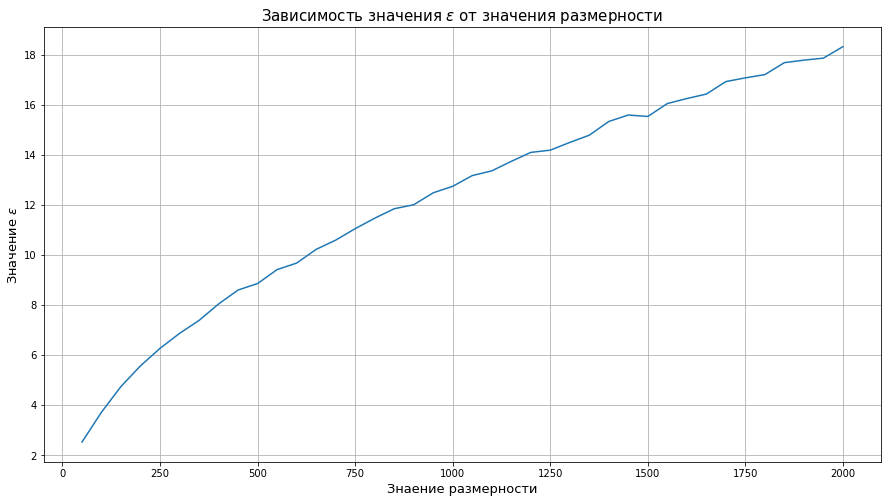

In [51]:
n_values = np.arange(50, 2050, 50)
diag_values = np.sqrt(n_values)

eps_values = np.array([])

for n in tqdm(n_values):
    eps_values = np.append(eps_values, Compute(n, 100, 1, 0.1*n/100, 20*n/100, 1000, False, False))

fig = plt.figure(figsize=(15,8))
plt.plot(n_values, eps_values)
plt.title('Зависимость значения $\epsilon$ от значения размерности', size=15)
plt.xlabel('Знаение размерности', size=13)
plt.ylabel('Значение $\epsilon$', size=13)
plt.legend()
plt.grid()
plt.show()

# Experiment 8 (eigenvalue hist)

In [7]:
all_eigenvalues = np.array([])
nomax_eigenvalues = np.array([])

for i in tqdm(range(100)):
    new_matrix = Compute4(100, 100, 1, 3.6, 4, 1000)
    #j = str(i)
    #name = j + '.txt'
    #np.savetxt(name, new_matrix, fmt="%d")
    eigenvalues = np.linalg.eigvals(new_matrix)
    all_eigenvalues = np.append(all_eigenvalues, eigenvalues)
    eigenvalues = np.sort(eigenvalues)
    eigenvalues = eigenvalues[:-1]
    nomax_eigenvalues = np.append(nomax_eigenvalues, eigenvalues)


100%|████████████████████████████████████████| 100/100 [01:43<00:00,  1.03s/it]


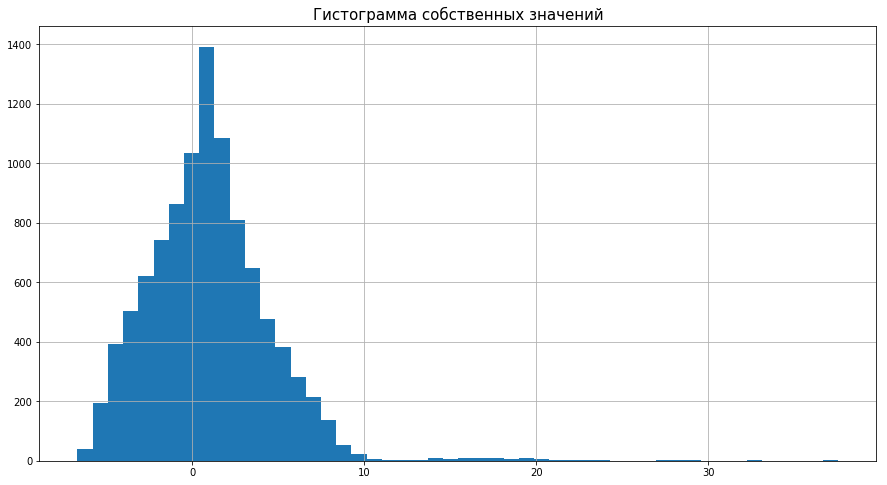

In [8]:
plt.figure(figsize=(15, 8))

plt.hist(all_eigenvalues, bins=50)
plt.title('Гистограмма собственных значений', size=15)
plt.grid()
plt.show()

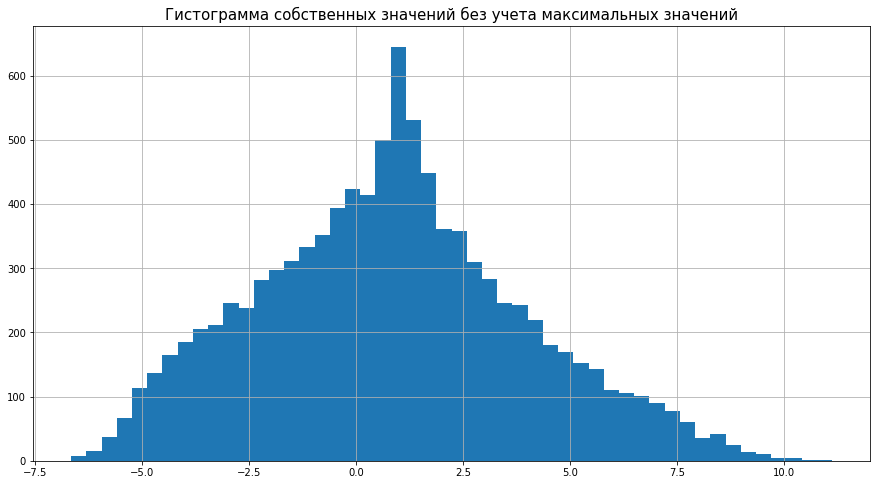

In [9]:
plt.figure(figsize=(15, 8))

plt.hist(nomax_eigenvalues, bins=50)
plt.title('Гистограмма собственных значений без учета максимальных значений', size=15)
plt.grid()
plt.show()